In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [5]:
Total_Accidents = pd.read_csv("Total Accidents V3.csv")
Total_Accidents.dropna(inplace=True)
Total_Accidents.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,120,173,138,118,114,87,70,83,70,...,73,71,62,71,79,46,70,66,101,96
1,Alaska,91,90,99,77,68,64,42,48,52,...,20,23,18,18,25,26,15,22,14,22
2,Arizona,327,321,239,302,331,222,217,188,174,...,158,99,95,87,97,90,123,129,96,162
3,Arkansas,92,111,115,91,87,75,74,50,55,...,55,68,56,54,49,47,64,60,37,75
4,California,849,920,770,894,900,771,745,797,603,...,399,365,426,379,369,386,350,322,324,493


In [6]:
Fatalities = pd.read_csv("Fatalities V3.csv")
Fatalities.dropna(inplace=True)
Fatalities.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,24,25,32,17,11,17,12,15,20,...,19,17,10,13,21,14,21,17,28,19
1,Alaska,14,23,38,26,18,21,16,21,16,...,15,22,10,11,7,19,20,22,11,24
2,Arizona,8,8,14,9,12,7,8,7,11,...,11,4,9,7,6,5,13,11,7,10
3,Arkansas,20,15,20,15,10,13,24,6,8,...,15,8,15,8,9,10,11,7,10,13
4,California,56,42,56,42,49,48,53,61,43,...,52,49,37,38,48,47,50,34,39,39


In [7]:
Fatal_Accidents = pd.read_csv("Fatal Accidents V3.csv")
Fatal_Accidents.dropna(inplace=True)
Fatal_Accidents.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,21,24,27,17,11,16,12,15,17,...,14,16,10,12,17,12,18,13,25,12
1,Alaska,13,19,24,21,16,20,14,16,14,...,13,15,7,10,7,14,13,17,8,15
2,Arizona,7,7,10,7,9,7,8,5,10,...,10,3,9,7,6,5,11,6,7,7
3,Arkansas,19,14,18,14,9,12,20,6,5,...,13,8,13,7,9,9,11,7,10,13
4,California,48,41,45,36,40,43,46,56,35,...,47,37,34,29,41,43,49,33,37,37


In [25]:
Alcohol_Fatal = pd.read_csv("Alcohol by State and Year V4.csv")
Alcohol_Fatal.dropna(inplace=True)
Alcohol_Fatal.head()

,State,Average Deaths,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,4.090909,5,6,1,4,5,5,1,1,10,1,6
1,Alaska,4.181818,1,8,2,4,3,3,6,2,7,8,2
2,Arizona,1.545455,3,0,3,2,1,2,2,1,0,1,2
3,Arkansas,1.909091,0,4,2,2,2,2,3,2,4,0,0
4,California,4.636364,4,3,6,2,5,3,3,4,5,6,10


In [26]:
Alcohol_Fatal2 = Alcohol_Fatal.drop(columns=['2010','2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020'])
Alcohol_Fatal2.head()


,State,Average Deaths
0,Alabama,4.090909
1,Alaska,4.181818
2,Arizona,1.545455
3,Arkansas,1.909091
4,California,4.636364


In [12]:
Ave_Pop = pd.read_csv("Population US by State and Year V3.csv")
Ave_Pop.dropna(inplace=True)
Ave_Pop.head()

,State,Average Population,2010,2020
0,Alabama,"4,902,270","4,779,736","5,024,803"
1,Alaska,"721,336","710,231","732,441"
2,Arizona,"6,785,002","6,392,017","7,177,986"
3,Arkansas,"2,964,075","2,915,918","3,012,232"
4,California,"38,376,847","37,253,956","39,499,738"


In [29]:
Ave_Pop2 = Ave_Pop.drop(columns=['2010', '2020'])
Ave_Pop2.head()


,State,Average Population
0,Alabama,"4,902,270"
1,Alaska,"721,336"
2,Arizona,"6,785,002"
3,Arkansas,"2,964,075"
4,California,"38,376,847"


In [31]:
Ave_Alcohol_Fatal = pd.merge(Alcohol_Fatal2, Ave_Pop2, on='State', how='outer')
Ave_Alcohol_Fatal.head()

,State,Average Deaths,Average Population
0,Alabama,4.090909,"4,902,270"
1,Alaska,4.181818,"721,336"
2,Arizona,1.545455,"6,785,002"
3,Arkansas,1.909091,"2,964,075"
4,California,4.636364,"38,376,847"


In [32]:
Ave_Alcohol_Fatal["% Death Per Person"] = ""

In [34]:
Ave_Alcohol_Fatal.dtypes

State                  object
Average Deaths        float64
Average Population     object
% Death Per Person     object
dtype: object

In [46]:
Ave_Alcohol_Fatal['Average Population'] = Ave_Alcohol_Fatal['Average Population'].str.replace(",", "").astype(float)

In [59]:
Ave_Alcohol_Fatal["% Death Per Person"] = (Ave_Alcohol_Fatal["Average Deaths"]/Ave_Alcohol_Fatal["Average Population"])*100
Ave_Alcohol_Fatal.head()


,State,Average Deaths,Average Population,% Death Per Person
0,Alabama,4.090909,4902270.0,0.000083
1,Alaska,4.181818,721336.0,0.000580
2,Arizona,1.545455,6785002.0,0.000023
3,Arkansas,1.909091,2964075.0,0.000064
4,California,4.636364,38376847.0,0.000012


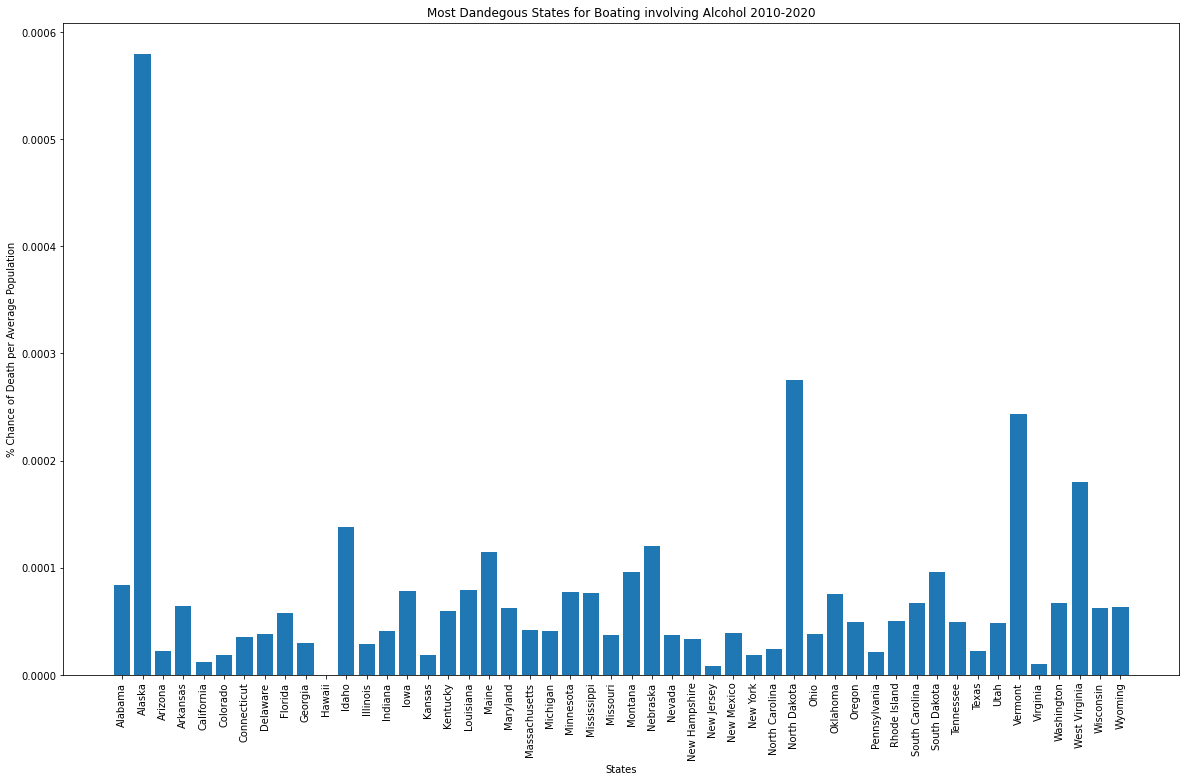

In [58]:
x_axis = Ave_Alcohol_Fatal["State"]
y_axis = Ave_Alcohol_Fatal["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Most Dandegous States for Boating involving Alcohol 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (20,12)
plt.show()